In [58]:
from collections import defaultdict
from random import uniform
from math import sqrt
import load_MNIST
from sklearn.metrics import classification_report
import numpy as np

def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    for point in data_points:
        shortest = 1e10  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if val < shortest:
                shortest = val
                shortest_index = i
        assignments.append(shortest_index)
    return assignments


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    print(data_set.shape)
    dimensions = data_set.shape[1]
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments = assign_points(dataset, k_points)
    old_assignments = None
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        old_assignments = assignments
        assignments = assign_points(dataset, new_centers)
    return assignments, new_centers


# points = [
#     [1, 2],
#     [2, 1],
#     [3, 1],
#     [5, 4],
#     [5, 5],
#     [6, 5],
#     [10, 8],
#     [7, 9],
#     [11, 5],
#     [14, 9],
#     [14, 14],
#     ]
# print k_means(points, 3)

In [60]:
center = np.array(center).reshape(len(center),28,28)

In [67]:
print(center[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

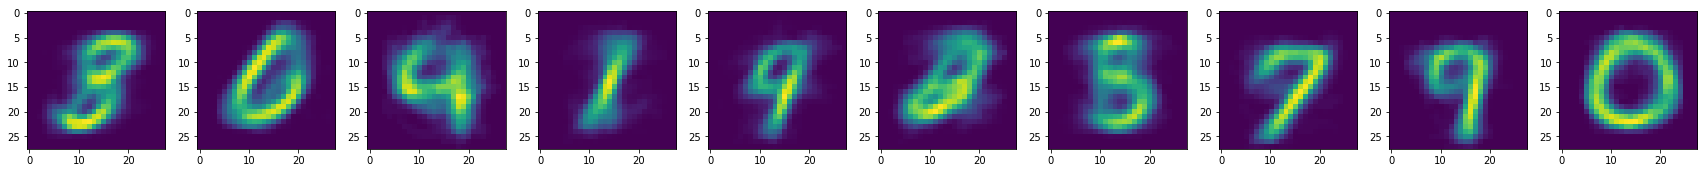

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.imshow(center[i])
plt.show()

In [50]:
assignment,center = k_means(train_data[:1000],10)

(1000, 784)


In [53]:
pre = assign_points(test_data[:100],center)

In [54]:
print(classification_report(pre,test_labels[:100]))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00        13
          3       0.00      0.00      0.00        16
          4       0.14      0.20      0.17        10
          5       0.00      0.00      0.00         5
          6       0.40      0.18      0.25        22
          7       0.40      0.75      0.52         8
          8       0.00      0.00      0.00        16
          9       0.00      0.00      0.00         5

avg / total       0.13      0.12      0.11       100



In [16]:
file = ["C:/Users/wtser/Desktop/learnData/data/Mnist/train-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-images.idx3-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/train-labels.idx1-ubyte",
       "C:/Users/wtser/Desktop/learnData/data/Mnist/t10k-labels.idx1-ubyte"]  

train_data,train_labels,test_data,test_labels = load_MNIST.load_data(file)
# scaler = StandardScaler()
# train_data = scaler.fit_transform(train_data)
# test_data = scaler.fit_transform(test_data)